In [1]:
import os
import numpy as np
from PIL import Image
import glob
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.decomposition import PCA

In [2]:
# current_directory = os.getcwd()

# sub_directory_path = os.path.join(current_directory, "data", "coffee")

# all_files = os.listdir(sub_directory_path)

# images = []

# for image_file in all_files:
#     image_path = os.path.join(sub_directory_path, image_file)
    
#     img = Image.open(image_path)
#     images.append(img)

In [3]:
# print(images)

In [4]:
dataset = {}
for target in sorted(glob.glob("./data/*")):
    target_name = target.split('/')[-1]
    filenames = sorted(glob.glob(target + '/*'))
    dataset[target_name] = np.array([np.array(Image.open(f)) for f in filenames]).transpose(1, 2, 0)
    
print(dataset.keys())

dict_keys(['coffee', 'rice', 'sugar_salt_flour', 'sugar_salt_flour_contamination', 'yatsuhashi'])


In [5]:
print(dataset['sugar_salt_flour'].shape)

(256, 192, 96)


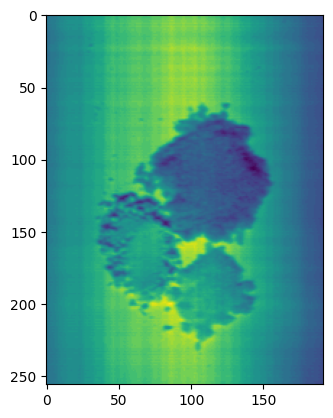

In [6]:
plt.imshow(dataset['sugar_salt_flour'][:, :, 10])

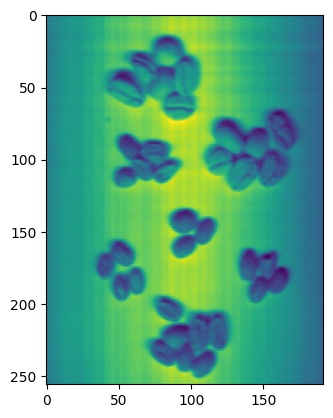

In [7]:
plt.imshow(dataset['coffee'][:, :, 10])

In [8]:
print(dataset['coffee'])

[[[36 37 39 ...  8  6  6]
  [35 37 39 ...  8  6  6]
  [35 37 40 ...  9  7  6]
  ...
  [27 28 31 ...  8  6  5]
  [27 28 31 ...  8  6  5]
  [26 28 31 ...  8  6  5]]

 [[38 39 41 ... 11 10 10]
  [38 39 41 ... 11 10 10]
  [37 39 42 ... 12 10 10]
  ...
  [30 31 33 ... 11  9  9]
  [30 31 33 ... 11  9  9]
  [30 31 33 ... 11  9  9]]

 [[37 39 42 ... 11 10 10]
  [37 39 42 ... 12 10 10]
  [37 39 42 ... 12 10 10]
  ...
  [30 32 34 ... 11  9  8]
  [30 31 34 ... 11  9  9]
  [30 31 34 ... 11 10  9]]

 ...

 [[38 39 41 ... 11 10  9]
  [37 39 41 ... 11 10  9]
  [37 39 42 ... 12 10  9]
  ...
  [31 32 34 ... 10  9  8]
  [30 32 34 ... 10  9  9]
  [30 32 33 ... 10  9  9]]

 [[38 39 42 ... 11  9  9]
  [38 39 42 ... 11  9  9]
  [38 39 42 ... 11 10  9]
  ...
  [31 32 34 ... 10  9  8]
  [31 32 34 ... 10  9  8]
  [31 32 34 ... 11 10  9]]

 [[38 39 41 ... 10  9  8]
  [37 38 41 ... 11  9  8]
  [37 38 41 ... 11  9  9]
  ...
  [30 31 34 ... 10  9  8]
  [30 31 33 ... 10  9  8]
  [30 31 33 ... 10  9  9]]]


In [9]:
height, width, bands = dataset['coffee'].shape

pixels = dataset['coffee'].reshape(-1, bands)

print(f"Height of the image - {height}")
print(f"Width of the Image - {width}")

print(f"Flattened Array - {pixels.shape}")

KM = KMeans(20, max_iter=300, random_state=43)
KM.fit(pixels)

Height of the image - 256
Width of the Image - 192
Flattened Array - (49152, 96)


KMeans(n_clusters=20, random_state=43)

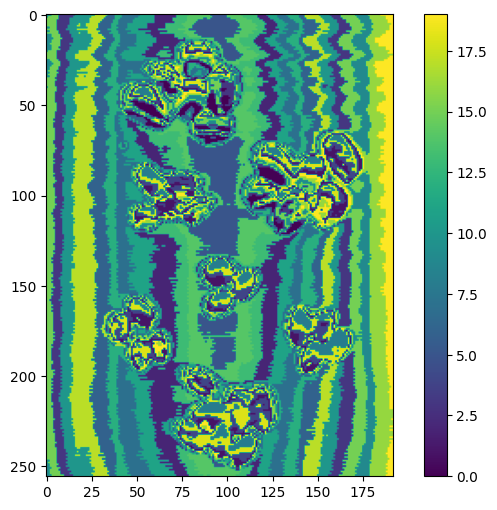

In [10]:
plt.figure(figsize=(8, 6))
labels = KM.labels_
clustered_image = labels.reshape(height, width)
plt.imshow(clustered_image, cmap='viridis')
plt.colorbar()


(-0.5, 191.5, 255.5, -0.5)

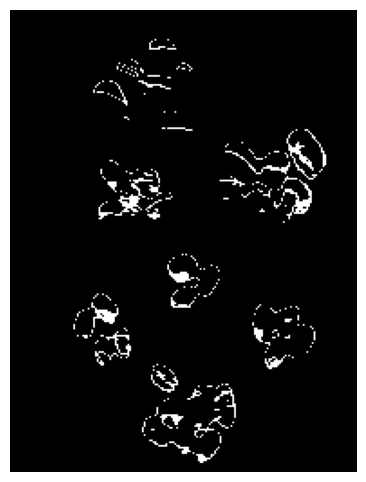

In [11]:
mask = (clustered_image == 1)

# Create an image to highlight the desired cluster
highlighted_image = np.zeros((height, width), dtype=np.uint8)
highlighted_image[mask] = 255  # Set pixels in the desired cluster to white
highlighted_image[~mask] = 100  # Set other pixels to gray

# Plot the highlighted image
plt.figure(figsize=(8, 6))
plt.imshow(highlighted_image, cmap='gray')
plt.axis('off')


Text(0.5, 1.0, 'Spectral Clustering (K=8)')

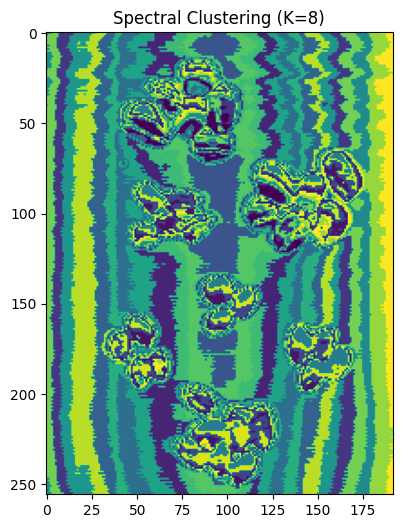

In [15]:
pca = PCA(n_components=30)
pixels_reduced = pca.fit_transform(pixels)

Spec_Clus = SpectralClustering(n_clusters=8, affinity='nearest_neighbors', n_neighbors=10 )

labels_NN = Spec_Clus.fit_predict(pixels)

clus_image_NN = labels.reshape(height, width)

plt.figure(figsize=(8, 6))
plt.imshow(clus_image_NN, cmap='viridis')
plt.title(f'Spectral Clustering (K={8})')
